This is your private sketch-notebook. Do whatever you want with it. When code is ready to be developed, please just copy and paste it to the final notebook. 

In [1]:
import sys
kaggle_path = '../../../Data/Kaggle/train/*'
sys.path.append('../../..')
from First_start.imports import *
from First_start.multi_gpu import *
from First_start.init_vars import *
from First_start.start_functions import *
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# Get x and y variables
x_train, y_train, x_test, y_test, image_df, dummy_df = get_xy(folders_path=kaggle_path, test_size=0.3,
                                                              img_size=(224, 224), seed=seed)

# Let's check the shape of those variables
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Own Code

In [4]:
from __future__ import division
#import Image
import math
import os

def long_slice(image_path, out_name, slice_size_hor,slice_size_ver):
    """slice an image into parts slice_size tall"""
    img = image.load_img(image_path,target_size = (224,224))
    width, height = img.size
    upper = 0
    left = 0
    nr_hor_slices = int(math.ceil(height/slice_size_hor)) * 2 - 1
    nr_ver_slices = int(math.ceil(width/slice_size_ver)) * 2 - 1
    hor_slices = nr_hor_slices
    ver_slices = nr_ver_slices
    count_hor = 0
    
    for hor_slice in range(hor_slices):
    
        #print count_hor
        if count_hor == hor_slices:
            lower = height
        else:
            lower = int(slice_size + count_hor * slice_size/2)
        count_ver = 0
        left = 0
        for ver_slice in range(ver_slices):
        #if we are at the end, set the lower bound to be the bottom of the image
            
            #set the bounding box! The important bit     
            if count_ver == ver_slices:
                right = width
            else: 
                right = int(slice_size + count_ver *slice_size/2)
            upper = lower - slice_size
            left = right - slice_size

            bbox = (left, upper, right, lower)
            print left, upper, right, lower
            working_slice = img.crop(bbox)
        
            #save the slice
            plt.imshow(working_slice)
            working_slice.save(os.path.join("test/", "slice_" + str(count_ver)+str(count_hor)+".png"))
            count_ver +=1
            

            
            
        count_hor += 1

#if __name__ == '__main__':
#    #slice_size is the max height of the slices in pixels


In [5]:
def sliding_window(image, stepSize, windowSize):

    # slide a window across the image

    for y in xrange(0, image.shape[0], stepSize):

        for x in xrange(0, image.shape[1], stepSize):

            # yield the current window

            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [6]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

afmetingen = [(0,0.5,0,0.5),(0.5,1,0,0.5),(0.5,1,0.5,1),(0,0.5,0.5,1)]

/usr/local/lib/python2.7/dist-packages/keras/applications/resnet50.py:222: UserWarning: You are using the TensorFlow backend, yet you are using the Theano image dimension ordering convention (`image_dim_ordering="th"`). For best performance, set `image_dim_ordering="tf"` in your Keras config at ~/.keras/keras.json.
  warnings.warn('You are using the TensorFlow backend, yet you '


TypeError: long_slice() takes exactly 4 arguments (3 given)

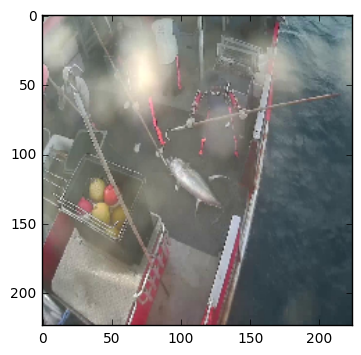

In [8]:

outcome = []
for img_path in image_df.image_name[:10]:
#img_path = 'elephant.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    long_slice(img_path, os.getcwd(), 112)
    #test_files = ['slice_11.png','slice_21.png','slice_12.png','slice_22.png']
    suboutcome = []
    for image_name in glob.glob('test/*.png'):
    #for i in range(4):
        #afmeting = afmetingen[i]
         #   print img.size
        img = image.load_img(image_name, target_size=(224, 224))
        plt.figure()
        plt.imshow(img)
        #row = img.size[0]
        #col = img.size[1]
        #print type(img)
          #  img = img.crop((0,112,0,112))
        #img = img.load()
           # print type(img.load())
        #img = img.resize(2,2)
        #plt.imshow(img)
        x = image.img_to_array(img)
        #print x.shape
        
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
        suboutcome.append((img,c(preds, top=10)[0]))
    outcome.append(suboutcome)
for suboutcome in outcome:
    for subimage in suboutcome:
        plt.imshow(subimage[0])
        plt.show()
        print subimage[1]   
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

In [ ]:
for img_path in image_df.image_name[:1]:
#img_path = 'elephant.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)

In [ ]:
# Smaller dataset for testing purposes!
dummy_df = dummy_df.iloc[0:101,:]

In [ ]:
Image(url= "https://kaggle2.blob.core.windows.net/competitions/kaggle/5568/media/species-ref-key.jpg")

In [ ]:
# Count of the image types
image_df.groupby('fish_type').count().sort_values('image_name')

In [ ]:
count = 0 # count, to test the algorithm with 100 pictures
images = []

for filename in dummy_df.image_name:
    img = cv2.imread(filename) # Read file    
    img = cv2.resize(img, (224, 224)) # Resize image to 224 x 224 pixels (dont feel obliged to use this)
    img = img.astype(np.float32) # Change to 32 bit floats (good for neural networks, other floats not as much making sense)

    # "Normalize" images
    for rgb_value in [0,1,2]:
        img[:, :, rgb_value] = img[:, :, rgb_value] / 255.0 # 255 is the RGB maximum
        img[:, :, rgb_value] -= numpy.mean(img[:, :, rgb_value])

    img = img.transpose((2,0,1))

    images.append(img)

# X and y value and labels
x = np.asarray(images)
y = dummy_df.iloc[:,1:9].as_matrix()
labels = dummy_df.image_name.apply(lambda path: path[-13:])

# table, just to be sure that everything goes well
dummy_df['image_bytes'] = images
dummy_df.head()

In [ ]:
split_no = 90

x_train = x[:split_no]
y_train = y[:split_no]
labels_train = labels[:split_no]

x_test = x[split_no:]
y_test = y[split_no:]
labels_test = labels[split_no:]

In [ ]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 224, 224), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
# Compile model
epochs = 1 # dont leave it like this, only for testing!
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

In [ ]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
classes = model.predict_proba(x_test, batch_size=32)

# get probability table
proba_df = pd.DataFrame(classes)
proba_df.columns = image_df.groupby('fish_type').count().index # workaround to get column names quickly and in right order

print("Accuracy: %.2f%%" % (scores[1]*100))
print ' '
proba_df

In [ ]:
proba_df['img_names'] = labels_test.values